# 1. Introdução

A análise abaixo foi feita utilizando dados fictícios de uma loja de veículos Nissan, e foram disponibilizados no site www.kaggle.com

Perguntas que serão respondidas com a análise:

**1. Desempenho de Vendas:**
- *Qual é o modelo de carro mais vendido?*
- *Existe uma correlação entre a performance do carro (performance) e o preço?*

**2. Segmentação de Mercado:**
- *Qual é a faixa etária dos clientes que mais compram carros?*
- *Existe uma preferência de cor dos carros entre diferentes gêneros?*

**3. Condição do Carro e Preço:**
- *Como a condição do carro (condition) impacta o preço de venda?*
- *Qual é a média de preço para carros em diferentes condições (very bad, bad, old, very good)?*

**4. Quilometragem e Preço:**
- *Existe uma correlação entre a quilometragem (km) do carro e o preço de venda?*
- *Qual é a média de quilometragem dos carros vendidos em diferentes faixas de preço?*

**5. Perfil Demográfico dos Clientes:**
- *Qual é a distribuição de gênero dos compradores de carros?*
- *Qual é a faixa etária mais comum dos compradores de cada modelo de carro?*

Fonte do dataset: https://www.kaggle.com/datasets/marius2303/nissan-all-models-price-prediction-dataset

# 2. Carregando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Carregando Dataset e Tratando os dados

In [2]:
df = pd.read_csv('/content/nissan-dataset.csv')

Verificando a estrutura do dataset

In [3]:
df.head()

,id,full_name,age,gender,model,color,performance,km,condition,price
0,1,Dominic Applin,42.0,Male,Quest,Mauv,299.0,509305.0,very bad,40394.91
1,2,Lenee Eteen,54.0,Polygender,R'nessa,Orange,109.0,965853.0,old,8687.90
2,3,Kendal Esselin,37.0,Male,March / Micra,Teal,52.0,380906.0,bad,44705.31
3,4,Nehemiah Marvelley,55.0,Male,Gloria,Green,336.0,573171.0,very good,32889.88
4,5,Domenic McGeouch,21.0,Male,Avenir,Khaki,2.0,809470.0,old,6949.22


# 3.1 Tratamento dos Dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  int64  
 1   full_name    9157 non-null   object 
 2   age          9154 non-null   float64
 3   gender       9144 non-null   object 
 4   model        9130 non-null   object 
 5   color        9139 non-null   object 
 6   performance  9143 non-null   float64
 7   km           9141 non-null   float64
 8   condition    9151 non-null   object 
 9   price        9159 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


Verifiquei na análise acima que existem colunas com valores ausentes, então agora irei tratar esses dados.
Primeiramente vou remover as linhas em que todos os dados são nulos, isso pode ter ocorrido devido um erro no banco de dados, ou um input indevido que gerou uma ocorrência de venda porém sem cliente, sem modelo de veículo e assim com todas as demais variáveis (colunas).

In [5]:
df.replace("None", pd.NA, inplace=True)
# Colunas que serão verificadas
colunas_verificar = ['full_name', 'age', 'gender', 'model', 'color', 'performance',
                    'km', 'condition', 'price']
# Removendo linhas onde todas as colunas são NaN
df.dropna(subset=colunas_verificar, how='all', inplace=True)

Agora vamos checar novamente.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9159 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9159 non-null   int64  
 1   full_name    9157 non-null   object 
 2   age          9154 non-null   float64
 3   gender       9144 non-null   object 
 4   model        9130 non-null   object 
 5   color        9139 non-null   object 
 6   performance  9143 non-null   float64
 7   km           9141 non-null   float64
 8   condition    9151 non-null   object 
 9   price        9159 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 787.1+ KB


Certo, todas as linhas em que todas as colunas, com exceto a "id", estavam como None foram removidas. Agora vamos tratar esses missings em cada coluna.

Vou definir a média dos valores de colunas numéricas para substituir os missings em algumas colunas, essa técnica nem sempre é a ideal, geralmente isso tem de ser conversando com as pessoas do setor/área responsável.
No entanto, como é um projeto próprio decidi utilizar essa alternativa.

In [7]:
idade_media = df['age'].mean()
performance_media = df['performance'].mean()
km_medio = df['km'].mean()
preco_medio = df['price'].mean()

Agora vou setar as alterações nas colunas.

In [8]:
df['full_name'].fillna('Unidentified', inplace=True)
df['age'].fillna(idade_media, inplace=True)
df['gender'].fillna('Not provided', inplace=True)
df['model'].fillna('Unidentified', inplace=True)
df['color'].fillna('Unidentified', inplace=True)
df['performance'].fillna(performance_media, inplace=True)
df['km'].fillna(km_medio, inplace=True)
df['condition'].fillna('Not defined', inplace=True)
df['price'].fillna(preco_medio, inplace=True)

Vamos verificar se funcionou.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9159 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9159 non-null   int64  
 1   full_name    9159 non-null   object 
 2   age          9159 non-null   float64
 3   gender       9159 non-null   object 
 4   model        9159 non-null   object 
 5   color        9159 non-null   object 
 6   performance  9159 non-null   float64
 7   km           9159 non-null   float64
 8   condition    9159 non-null   object 
 9   price        9159 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 787.1+ KB


In [10]:
df.isnull().sum()

,0
id,0
full_name,0
age,0
gender,0
model,0
color,0
performance,0
km,0
condition,0
price,0


Ótimo, agora temos a mesma quantidade de valores em todas as colunas e nenhum missing, posso prosseguir.

## 3.1 Criando Ranges

Para tornar as análises mais eficazes, irei criar "Ranges" de valores para algumas variáveis (colunas)

In [11]:
## Range de idade
# Definindo os intervalos e os rótulos
bins = [18, 25, 35, 45, 60, float('inf')]
labels = ["18-25", "26-35", "36-45", "46-60", "60+"]
# Criando a coluna
df['AgeRange'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

In [12]:
## Range de Performance
bins = [0, 100, 200, 350, float('inf')]
labels = ["Low", "Medium", "High", "Very High"]
df['PerformanceRange'] = pd.cut(df['performance'], bins=bins, labels=labels, right=True, include_lowest=True)

In [13]:
## Range de KM
bins = [500, 15000, 45000, 90000, 200000, 500000, float('inf')]
labels = ["500km ~ 15000km", "15001km ~ 45000km", "45001km ~ 90000km", "90001km ~ 200000km", "200001km ~ 500000km", "+ 500000km"]
df['KMRange'] = pd.cut(df['km'], bins=bins, labels=labels, right=True, include_lowest=True)

In [14]:
## Range de Preço
bins = [3000, 10000, 20000, 45000, 90000, 150000, 200000, float('inf')]
labels = ["$3.000 ~ $10.000", "$10.001 ~ $20.000", "$20.001 ~ $45.000", "$45.001 ~ $90.000", "$90.001 ~ $150.000", "$150.001 ~ $200.000", "+ $200.000"]
df['PriceRange'] = pd.cut(df['price'], bins=bins, labels=labels, right=True, include_lowest=True)

In [15]:
# Verificando o resultado
df.head(2)

,id,full_name,age,gender,model,color,performance,km,condition,price,AgeRange,PerformanceRange,KMRange,PriceRange
0,1,Dominic Applin,42.0,Male,Quest,Mauv,299.0,509305.0,very bad,40394.91,36-45,High,+ 500000km,$20.001 ~ $45.000
1,2,Lenee Eteen,54.0,Polygender,R'nessa,Orange,109.0,965853.0,old,8687.90,46-60,Medium,+ 500000km,$3.000 ~ $10.000


Agora que finalizei os tratamentos, vamos começar as análises para responder as perguntas.

# 4. Desempenho de Vendas

### 1.   *Qual é o modelo de carro mais vendido?*

Primeiramente, vamos verificar quantos modelos distintos de carros possuem no dataset.

In [16]:
df['model'].nunique()

71

Há uma grande variedade de veículos, agora vamos verificar o TOP5

In [17]:
df['model'].value_counts().sort_values(ascending=False).head(5)

,count
model,
Juke,882
Leaf,872
Gloria,859
Pathfinder,836
Maxima,833


Portanto, o modelo de veículo mais vendido nessa base de dados é o **Juke** com **882** vendas.

### 2.   *Existe uma correlação entre a performance do carro (performance) e o preço?*

In [18]:
df[['performance', 'price']].corr()

,performance,price
performance,1.000000,-0.016901
price,-0.016901,1.000000


Com base nessa primeira análise, pode-se verificar que **não** há uma correlação forte. Agora irei plotar um gráfico de dispersão para analisarmos um contexto geral de correlação dos veículos com a performance.

In [19]:
## Gráfico gerado via plotly.express, o GitHub não suporta mas irei deixar o código aqui.
fig = px.scatter(df, x='performance', y='price', title='Relação entre Performance e Preço dos Carros',
                 labels={'performance': 'Performance', 'price': 'Preço'},
                 opacity=0.5)
fig.show()

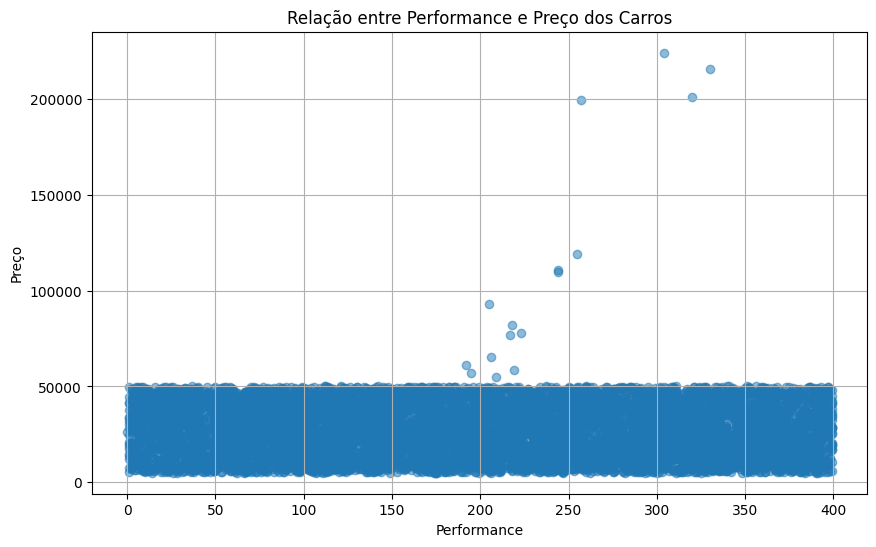

In [20]:
## Gráfico gerado utilizando o matplotlib.pyplot
x = df['performance']
y = df['price']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Relação entre Performance e Preço dos Carros')
plt.xlabel('Performance')
plt.ylabel('Preço')
plt.grid(True)
plt.show()


Com base na análise realizada, podemos constatar que não **há praticamente nenhuma correlação entre performance e preço**.
Além disso, podemos verificar com essa análise que a maioria esmagadora dos veículos, independetemente de performance, se mantém na faixa do $50.000.

Explicando de forma simples e resumida a funcionamento da função corr().
- **Valor próximo a 1:** maior é a correlação, ou seja, quanto mais o valor de uma variável aumenta a outra aumenta de forma equivalente;
- **Valor próximo a 0:** significa que há pouca correlação entre as variáveis ou não há.
- ** Valor próximo a -1:** representa uma correlação negativa. Nesse caso, quanto mais uma das variáveis aumenta, a outra tende a diminuir.

Com base nas explicações e na análise, podemos concluir que o valor de **-0.016911** está mais próximo de 0, ou seja, a correlação é praticamente inexistente. Portanto a performance de um veículo Nissan não necessariamente será maior quando um carro tiver um valor maior e vice-versa.

# 5. Segmentação de Mercado:

### 1. *Qual é a faixa etária dos clientes que mais compram carros?*

In [21]:
## Gráfico gerado via plotly.express, o GitHub não suporta mas irei deixar o código aqui.
# Criando uma variável para gerar o gráfico
clientes_por_faixa = df['AgeRange'].value_counts().reset_index()
clientes_por_faixa.columns = ['Faixa Etária', 'Contagem']
# Gerando o gráfico
fig = px.bar(clientes_por_faixa, x='Faixa Etária', y='Contagem', title='Compra de veículos Nissan por Faixa Etária')
fig.show()

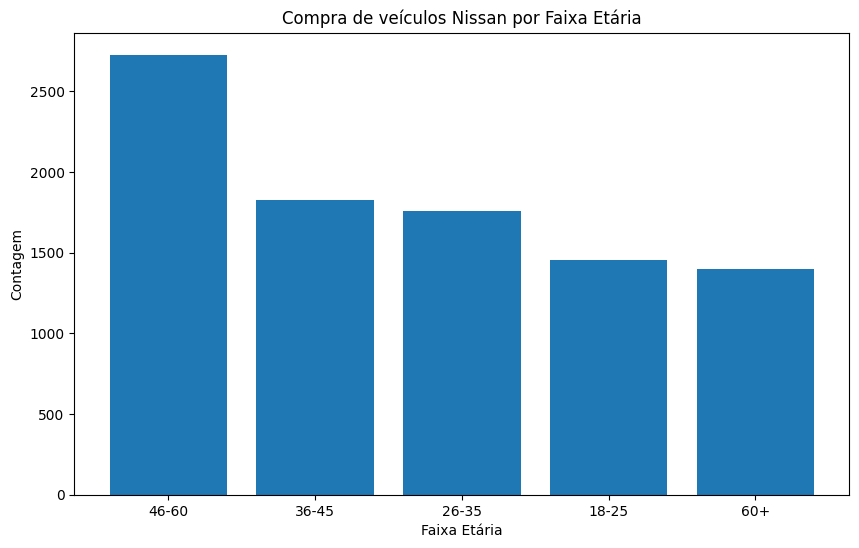

In [22]:
## Gráfico gerado utilizando o matplotlib.pyplot
plt.figure(figsize=(10, 6))
plt.bar(clientes_por_faixa['Faixa Etária'], clientes_por_faixa['Contagem'])
plt.title('Compra de veículos Nissan por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.show()

Com base na análise feita após a geração do gráfico, infere-se que a faixa etária que **mais compra veículos** Nissan é entre **46 e 60 anos**, com **2727 veículos** comprados enquanto a faixa que fica na **segunda colocação** adquiriu **1820 veículos**, uma **diferença de 49,67%**

### 2. *Existe uma preferência de cor dos carros entre diferentes gêneros?*

Primeiramente vamos verificar a quantidade distinta de cores possíveis para os veículos e a diversidade de gêneros no dataset.

In [23]:
# Quantidade distinta de cores
df['color'].nunique()

24

In [24]:
# Quantidade distinta de gêneros
df['gender'].nunique()

9

Há uma boa diversidade em ambas variáveis, agora vamos realizar a análise e responder a pergunta.

In [25]:
## Gráfico gerado via plotly.express, o GitHub não suporta mas irei deixar o código aqui.
# Agrupando os dados para gerar o gráfico
cor_por_genero = df.groupby(['color', 'gender'], observed=False).size().reset_index(name='Contagem')

# Gerando o gráfico
fig = px.bar(cor_por_genero,
             x='color',
             y='Contagem',
             color='gender',
             barmode='group',
             title='Análise de preferência de Cor dos Veículos por gênero')

# Ajustando o layout do gráfico
fig.update_layout(
    xaxis_title='Cor',
    yaxis_title='Quantidade',
    legend_title='Gênero',
    bargap=0.05,
    bargroupgap=0.1
)

fig.show()


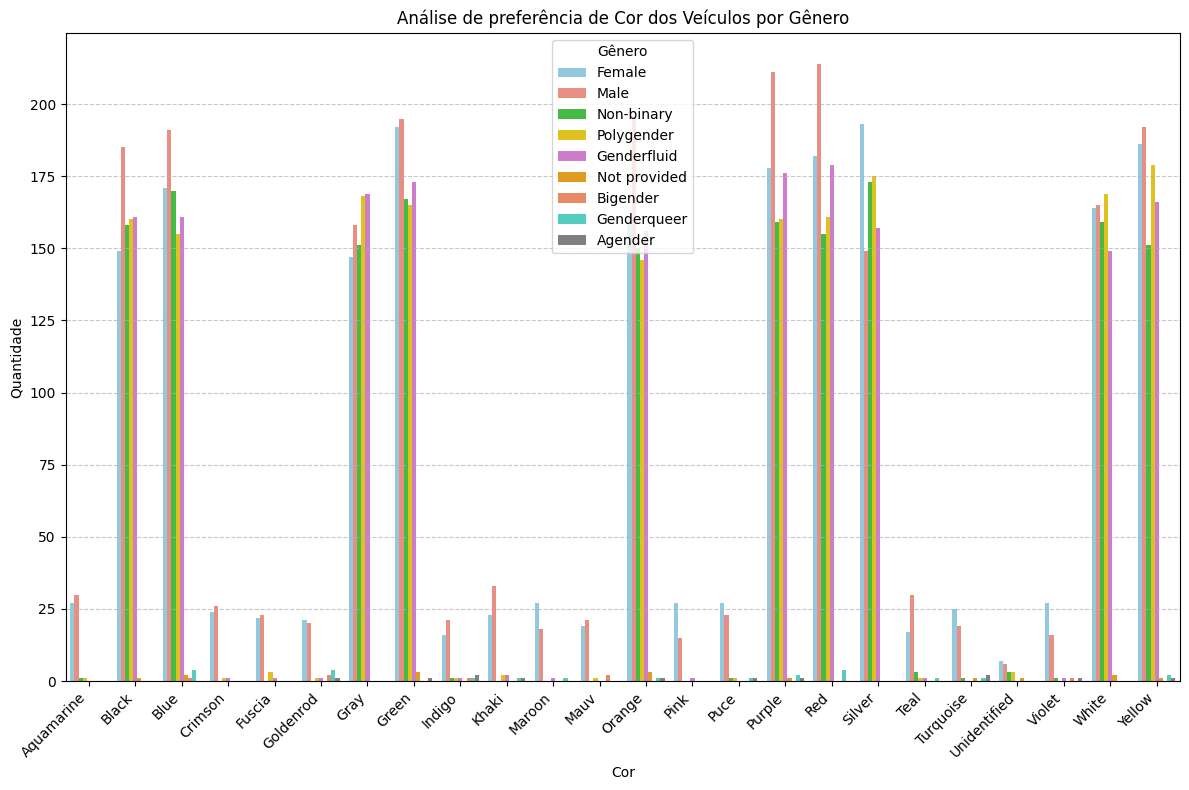

In [26]:
## Gráfico gerado utilizando o matplotlib.pyplot e o seaborn - infelizmente a visualização deste gráfico não ficou boa utilizando essas bibliotecas
# Aqui alterei a cor das barras para tentar melhorar a visualização
cores_barras = {
    'Female': 'skyblue',
    'Male': 'salmon',
    'Non-binary': 'limegreen',
    'Polygender': 'gold',
    'Genderfluid': 'orchid',
    'Bigender': 'coral',
    'Genderqueer': 'turquoise',
    'Agender': 'gray',
    'Not provided' : 'orange'
}

plt.figure(figsize=(12, 8))
sns.barplot(data=cor_por_genero, x='color', y='Contagem', hue='gender', palette=cores_barras)
plt.title('Análise de preferência de Cor dos Veículos por Gênero')
plt.xlabel('Cor')
plt.ylabel('Quantidade')
plt.legend(title='Gênero')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Com base na análise feita e a utilização do gráfico, podemos verificar que **não há uma cor de veículo que possamos considerar uma preferência absoluta.** Dentre os gêneros, é claro que a **cor vermelha é a que possui mais busca entre os homens** e a **prata entre as mulheres**, no entanto, chama a atenção a baixa procura por algumas cores e devido a isso vamos alterar a forma de ver o gráfico trazendo apenas a quantidade de compras por cor, sem os gêneros.

In [27]:
## Gráfico gerado via plotly.express, o GitHub não suporta mas irei deixar o código aqui.
compras_por_cor = df['color'].value_counts().reset_index()
compras_por_cor.columns = ['Cor', 'Contagem']
fig = px.bar(compras_por_cor, x='Cor', y='Contagem', title='Compra de veículos Nissan por Cor')
fig.show()

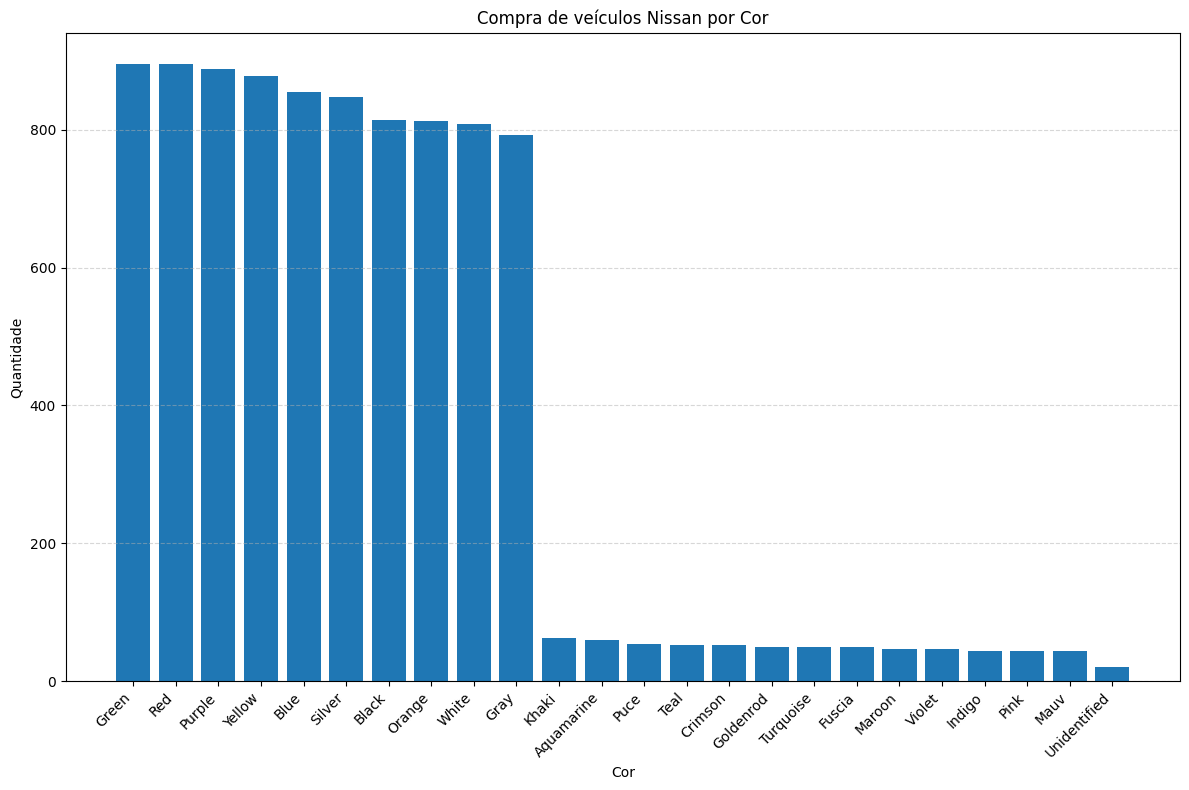

In [28]:
## Gráfico gerado utilizando o matplotlib.pyplot
plt.figure(figsize=(12, 8))
plt.bar(compras_por_cor['Cor'], compras_por_cor['Contagem'])
plt.title('Compra de veículos Nissan por Cor')
plt.xlabel('Cor')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

É muito chamativo como a quantidade de **vendas dos veículos com as cores Kahki, Aquamarine, Puce, Teal, Crimson, Goldenrod, Fuscia, Turquoise, Violet, Maroon, Indigo, Pink e Mauv está muito abaixo das demais**.

Nesse caso, pode ser interessante um **estudo mais aprofundado sobre a relação de Venda x Produção destes veículos com tais colorações**.

# 5. Condição do Carro e Preço:

### 1. *Como a condição do carro impacta o preço de venda?*

Para responder essa pergunta, vamos realizar algumas análises com base em diferentes gráficos, iniciando com o gráfico de dispersão.

In [29]:
## Gráfico gerado via plotly.express, o GitHub não suporta mas irei deixar o código aqui.
fig = px.scatter(df, x='condition', y='price', title='Relação entre a Condição do Veículo e o Preço',
                 labels={'condition': 'Condição', 'price': 'Preço'},
                 opacity=0.5)
fig.show()

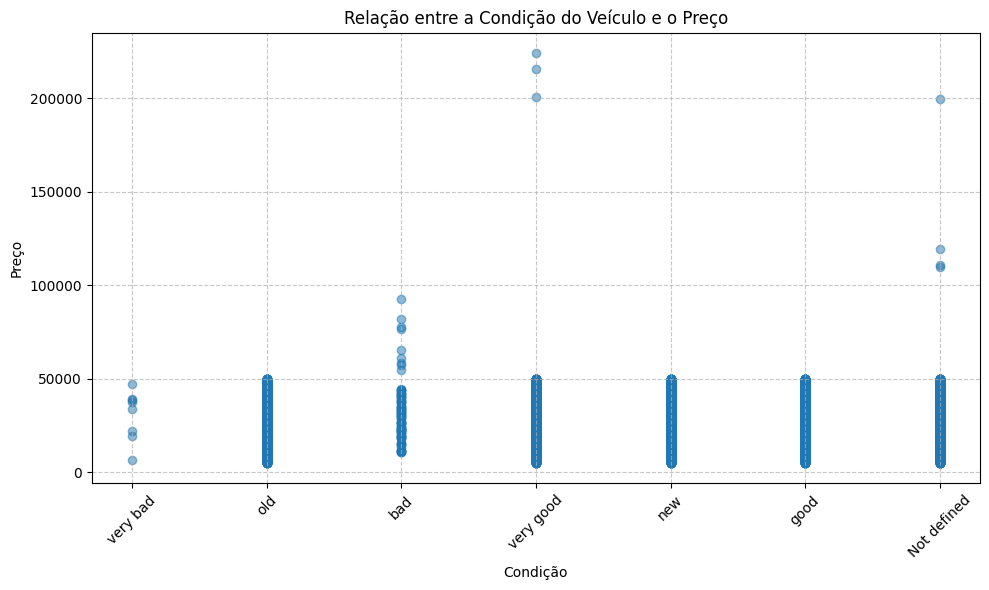

In [30]:
## Gráfico gerado utilizando o matplotlib.pyplot
# Criando uma coluna 'condition' para categórica para gerar o gráfico
df['condition_code'] = pd.Categorical(df['condition']).codes
plt.figure(figsize=(10, 6))
plt.scatter(df['condition_code'], df['price'], alpha=0.5)
plt.title('Relação entre a Condição do Veículo e o Preço')
plt.xlabel('Condição')
plt.ylabel('Preço')
plt.xticks(ticks=range(len(df['condition'].unique())), labels=df['condition'].unique(), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Este gráfico nos mostrou que há **pouco impacto**, apenas a condição **"good"** demonstrou ter uma quantidade de veículos **minimamente significativa** acima da faixa de $50.000.

A **maioria** dos valores se concentram na faixa de **$50.000 independentemente da condição do veículo**.

Vamos fazer uma contagem de veículos na condição "good" e uma contagem acima de $50.000 na condição "good".

In [31]:
len(df[df['condition'] == "good"])

96

In [32]:
len(df[(df['condition'] == 'good') & (df['price'] > 50000)])

9

Com isso, verificamos que **96** veículos se enquadram na condição "good" porém apenas **9 estão acima da faixa dos 50k**, uma representatividade muito baixa.

Contudo, irei fazer uma outra análise, dessa vez com o valor médio dos veículos dentre as condições e responder a questão 2.

### 2. *Qual é a média de preço para carros em diferentes condições (very bad, bad, old, very good)?*

In [33]:
media_valor_condicao = df[['condition', 'price']].groupby('condition', as_index=False)['price'].mean().sort_values(by='price', ascending=False)
# Gerando o gráfico
fig = px.bar(media_valor_condicao,
             x='condition',
             y='price',
             barmode='group',
             title='Análise de Impacto da Condição do Veículo no Preço')

fig.update_layout(
    xaxis_title='condição',
    yaxis_title='Preço',
    bargap=0.05,
    bargroupgap=0.1
)

fig.show()

De fato existe um **impacto pequeno da condição do veículo sobre o preço**, outros fatores podem influenciar neste caso e é necessário uma análise com mais dados para entender essa distribuição de valores.

# 6. Quilometragem e Preço:

### 1. Existe uma correlação entre a quilometragem do carro e o preço de venda?

Essa é uma pergunta muito parecida com a anterior e vou utilizar a mesma lógica para a análise.

In [34]:
fig = px.scatter(df, x='KMRange', y='price', title='Relação entre KM rodados e o Preço',
                 labels={'KMRange': 'Range de RM', 'price': 'Preço'},
                 opacity=0.5)
fig.show()

Novamente, podemos observar que há uma *correlação muito fraca* nesse ponto, em poucos casos os veículos na faixa de 500km e 15.000km ultrapassam a faixa de $50.000 e, antes de analisar a média vou fazer uma análise mais específica de correlação.

In [35]:
df[['km', 'price']].corr()

,km,price
km,1.000000,-0.026255
price,-0.026255,1.000000


Relembrando a explicação feita anteriormente:

- **Valor próximo a 1:** maior é a correlação, ou seja, quanto mais o valor de uma variável aumenta a outra aumenta de forma equivalente;

- **Valor próximo a 0:** significa que há pouca correlação entre as variáveis ou não há.

- **Valor próximo a -1:** representa uma correlação negativa. Nesse caso, quanto mais uma das variáveis aumenta, a outra tende a diminuir.

Portanto, podemos concluir que a **correlação é muito fraca ou quase inexistente**.

### 2. *Qual é a média de quilometragem dos carros vendidos em diferentes faixas de preço?*

In [36]:
media_km_preco = df[['km', 'PriceRange']].groupby('PriceRange', as_index=False)['km'].mean().sort_values(by='km', ascending=False)
# Gerando o gráfico
fig = px.bar(media_km_preco,
             x='PriceRange',
             y='km',
             barmode='group',
             title='Análise de média de KM percorrido por Veículo dentre as Faixas de Preço')

fig.update_layout(
    xaxis_title='Faixa de preço',
    yaxis_title='Média de KM',
    bargap=0.05,
    bargroupgap=0.1
)

fig.show()

<ipython-input-36-366481b60fae>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Novamente podemos observar que **não há correlação alguma aqui**, ao mesmo tempo que os **veículos acima de 200k tem em média 526.636km percorridos**, os veículos na **faixa de 3k e 10k tem uma média de 519.100**.

# 7. Perfil Demográfico dos Clientes:

### 1. *Qual é a distribuição de gênero dos compradores de carros?*

In [37]:
compras_genero = df['gender'].value_counts().reset_index()
compras_genero.columns = ['Gênero', 'Contagem']

fig = px.bar(compras_genero, x='Gênero', y='Contagem', title='Compra de veículos por Gênero')
fig.show()

A distribuição de compras de veículos foi gerada acima e o gênero que lidera as compras é o **Masculino** com **2157** aquisições.

### 2. *Qual é a faixa etária mais comum dos compradores de cada modelo de carro?*

Como visto na pergunta **1** do tópico **5**, o dataset possui **71** modelos de carros distintos, ou seja, é inviável plotar isso em um gráfico, devido a isso irei apenas gerar os dados.

In [38]:
# Para fazer a análise eresponder essa pergunta tive que usar a função lambda em conjunto com x.mode()[0], basicamente para encontrar a moda em cada modelo de veículo
melhor_faixa_por_modelo = df.groupby('model')['AgeRange'].agg(lambda x: x.mode()[0]).reset_index()
pd.set_option('display.max_rows', None)
# Como o terminal não exibe naturalmente todos os resultados, foi necessário utilizar o código acima para remover o limite de linhas exibidas
melhor_faixa_por_modelo

,model,AgeRange
0,370Z,18-25
1,AD,36-45
2,Almera,46-60
3,Altima,46-60
4,Armada,36-45
5,Avenir,46-60
6,Bluebird,46-60
7,Bluebird Sylphy,46-60
8,Cabstar / Atlas,46-60
9,Caravan / Urvan,26-35


# 8. Conclusões com base nas Perguntas Iniciais:

## 8.1 Impacto da Condição do Veículo no Preço:
* Com base na análise realizada, podemos constatar que não **há praticamente nenhuma correlação entre performance e preço**. Além disso, podemos verificar com essa análise que a maioria esmagadora dos veículos, independetemente de performance, se mantém na faixa do $50.000.

## 8.2 Correlação Entre Quilometragem e Preço:
* Nessa análise novamente foi possível observar que há uma correlação muito fraca entre as variáveis "km" e "price", mostrando que não há um padrão que interfira para que o preço distoe de um veículo para os demais.

## 8.3 Segmentação de Mercado por Faixa Etária:
* A maior parte dos clientes estão concentrados na faixa etária entre 46 e 60 anos, explicitando que este grupo é um segmento de mercado importante para a loja com 49,42% de compras a mais que a faixa etária na segunda colocação que é entre 36 e 45 anos. Portanto, se agruparmos as duas faixas etárias o range ficaria entre 36 e 60 anos, e esse grupo representa 49,69% de toda a base de dados.

## 8.4 Preferências de Cor por Gênero:
* Com base na análise feita e a utilização do gráfico, podemos verificar que **não há uma cor de veículo que possamos considerar uma preferência absoluta.** Dentre os gêneros, é claro que a **cor vermelha é a que possui mais busca entre os homens** e a **prata entre as mulheres**, no entanto, chama a atenção a baixa procura por algumas cores e devido a isso vamos alterar a forma de ver o gráfico trazendo apenas a quantidade de compras por cor, sem os gêneros.

## 8.5 Modelo de Veículo Mais Vendido:
* Foi identificado que o modelo de veículo mais vendido nessa base de dados é o **Juke** com **882** vendas.